Credit: AmosEgonmwan

## The Analysis is to be done on the neighbourhoods in Frederiction, New Brunswick, Canada
 An internet link containing the geographical coordinates (latitude & longitude) of the neighbourhoods of Fredericton is accessed and explored in this section.

In [2]:
#The data is available in a json file from the credited data source
Url = 'https://opendata.arcgis.com/datasets/823d86e17a6d47808c6e4f1c2dd97928_0.geojson'

In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import requests
"Print Libraries are ready"

'Print Libraries are ready'

In [4]:
#import json to read the Json file
import json
"print json imported"

'print json imported'

In [5]:
U = requests.get(Url)

In [6]:
geo1 = U.json()

In [7]:
Neigh = geo1['features']
Neigh[0]

{'type': 'Feature',
 'properties': {'FID': 1,
  'OBJECTID': 1,
  'Neighbourh': 'Fredericton South',
  'Shape_Leng': 40412.2767429,
  'Shape_Area': 32431889.0002},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-66.6193489311946, 45.8688925859664],
    [-66.5986068312843, 45.8934317575498],
    [-66.5998465063764, 45.8962889533894],
    [-66.6005561754508, 45.8987959122414],
    [-66.6007627879662, 45.9004150599189],
    [-66.6005112596866, 45.9020341603803],
    [-66.5993703992758, 45.9049409211054],
    [-66.5983912356161, 45.9066536507875],
    [-66.5950405196063, 45.9110977503182],
    [-66.5924713378938, 45.9137165396725],
    [-66.5975198697905, 45.9151915074375],
    [-66.6016161874861, 45.9165914405789],
    [-66.6063862416448, 45.9184662957134],
    [-66.6102310310608, 45.9201848572716],
    [-66.6193938469588, 45.9264149777787],
    [-66.6194297795702, 45.9243466803461],
    [-66.6206694546623, 45.9221345790227],
    [-66.6241459348118, 45.9181100781124],
    [-66.624963

The Fredericton crime data by neighbourhood is available as a free csv file at http://data-fredericton.opendata.arcgis.com/datasets/0ff4acd0a2a14096984f85c06fe4e38e_0

In [8]:
###Read Federiction's crime data. The data has been gotten from the ferediction open datasets.
Crime = pd.read_csv('Crime_by_neighbourhood_2017.csv')
Crime.head()

,Neighbourhood,From_Date,To_Date,Crime_Code,Crime_Type,Ward,City,FID
0,Fredericton South,2017-01-05T00:00:00.000Z,2017-01-26T00:00:00.000Z,2120,B&E NON-RESIDNCE,7,Fredericton,1
1,Fredericton South,2017-03-04T00:00:00.000Z,2017-03-06T00:00:00.000Z,2120,B&E NON-RESIDNCE,7,Fredericton,2
2,Fredericton South,2017-05-07T00:00:00.000Z,NaN,2120,B&E NON-RESIDNCE,12,Fredericton,3
3,Fredericton South,2017-06-20T00:00:00.000Z,2017-06-21T00:00:00.000Z,2120,B&E NON-RESIDNCE,12,Fredericton,4
4,Fredericton South,2017-07-09T00:00:00.000Z,2017-07-10T00:00:00.000Z,2120,B&E NON-RESIDNCE,7,Fredericton,5


In [ ]:
Crime

In [9]:
#From the information on the data set, it is clear that 2 rows have incomplete data, From_Date and To_Date. 
#Hence these 2 columns will be removed because the data is not datetime bound.
Crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
Neighbourhood    1460 non-null object
From_Date        1456 non-null object
To_Date          766 non-null object
Crime_Code       1460 non-null int64
Crime_Type       1460 non-null object
Ward             1460 non-null int64
City             1460 non-null object
FID              1460 non-null int64
dtypes: int64(3), object(5)
memory usage: 91.3+ KB


In [10]:
Crime.drop(["From_Date","To_Date"], axis = 1, inplace = True)

In [11]:
Crime.head()

,Neighbourhood,Crime_Code,Crime_Type,Ward,City,FID
0,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,1
1,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,2
2,Fredericton South,2120,B&E NON-RESIDNCE,12,Fredericton,3
3,Fredericton South,2120,B&E NON-RESIDNCE,12,Fredericton,4
4,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,5


#Quick Analysis on the neighbourhoods with the most crime
1) WHat are the different crime types and how many are they?
2) How many wards are in the city?
3) How many Neighbourhoods are in the city?


In [13]:
#1
Crime["Crime_Type"].unique()
#From here we can notice that there is a blank cell so we will have to see why it is blank

array(['B&E NON-RESIDNCE', 'MISCHIEF TO PROP', 'THEFT BIKE<$5000',
       'THEFT FROM MV < $5000', 'THEFT FROM MV > $5000',
       'THEFT OTH <$5000', 'ARSON BY NEG', 'B&E OTHER', 'B&E RESIDENCE',
       'MOTOR VEH THEFT', 'ARSON-DAM.PROP.', 'B&E STEAL FIREAR',
       'THEFT OTH >$5000', 'ARSON', 'MISCHIEF-DATA', 'MISCHIEF OBS USE',
       'THEFT OVER $5000', 'THEFT,BIKE>$5000', ' '], dtype=object)

In [14]:
#1b)
Crime["Crime_Type"].nunique()

19

In [15]:
Crime[Crime["Crime_Type"] == ' ']
#So these 4 neighbourhoods do not have any crime rates. Naturally the should be dropped but they will be used as a litmus test

,Neighbourhood,Crime_Code,Crime_Type,Ward,City,FID
993,Knowledge Park,0,,0,,994
999,Grasse Circle,0,,0,,1000
1134,Fredericton South,0,,0,,1135
1449,Wesbett / Case,0,,0,,1450


In [16]:
#2) There 13 Wards 
Crime.Ward.nunique()

13

In [17]:
#3) How many Neighbourhoods are in the city? Answer is 66.
Crime.Neighbourhood.nunique()

66

In [18]:
CN = Crime.groupby("Neighbourhood").count()["Crime_Type"]
CN

Neighbourhood
Barkers Point                              47
Brookside                                  54
Brookside Estates                           9
Brookside Mini Home Park                    5
College Hill                               41
Colonial heights                            9
Cotton Mill Creek                           4
Diamond Street                              1
Doak Road                                   1
Douglas                                     3
Downtown                                  127
Dun's Crossing                             18
Forest Hill                                12
Fredericton South                          85
Fulton Heights                             36
Garden Creek                               13
Garden Place                                4
Gilridge Estates                            3
Golf Club                                   7
Grasse Circle                               1
Greenwood Minihome Park                     2
Hanwell North       

In [19]:
CND = pd.DataFrame(CN)
CND.head()

,Crime_Type
Neighbourhood,
Barkers Point,47
Brookside,54
Brookside Estates,9
Brookside Mini Home Park,5
College Hill,41


In [20]:
CND.reset_index(inplace = True)

In [41]:
CND.columns = ["Neighbourhood","Frequency"]

In [48]:
CND.nlargest(5,"Frequency")

,Neighbourhood,Frequency
40,Platt,198
10,Downtown,127
38,North Devon,113
13,Fredericton South,85
42,Prospect,81


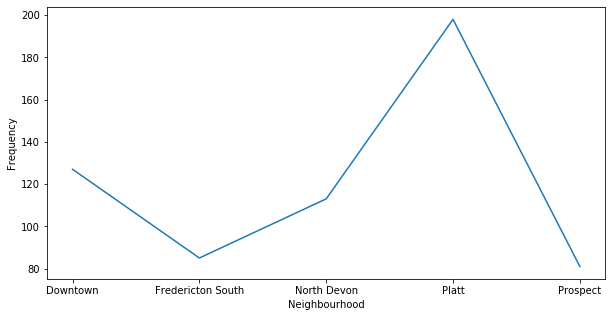

In [49]:
#The top 5 Neighbourhoods by crime frequency i.e the target market
plt.figure(figsize = (10,5))
Chart = sns.lineplot(x = "Neighbourhood", y = "Frequency", data = CND.nlargest(5,"Frequency"))

In [119]:
CND.describe()

,Frequency
count,66.000000
mean,22.121212
std,34.879359
min,1.000000
25%,3.000000
50%,9.000000
75%,23.250000
max,198.000000


In [27]:
CT = Crime.groupby("Crime_Type").size()


In [28]:
CTD = pd.DataFrame(CT)

In [30]:
CTD.reset_index(inplace = True)

In [32]:
CTD.columns = ["Crime", "Frequency"]

In [33]:
# It is clear that the most common type of crime in Ferediction is theft less than $5,000 
CTD.sort_values("Frequency", ascending = False)

,Crime,Frequency
15,THEFT OTH <$5000,458
13,THEFT FROM MV < $5000,356
9,MISCHIEF TO PROP,246
6,B&E RESIDENCE,151
12,THEFT BIKE<$5000,63
5,B&E OTHER,58
4,B&E NON-RESIDNCE,51
11,MOTOR VEH THEFT,40
16,THEFT OTH >$5000,9
14,THEFT FROM MV > $5000,5


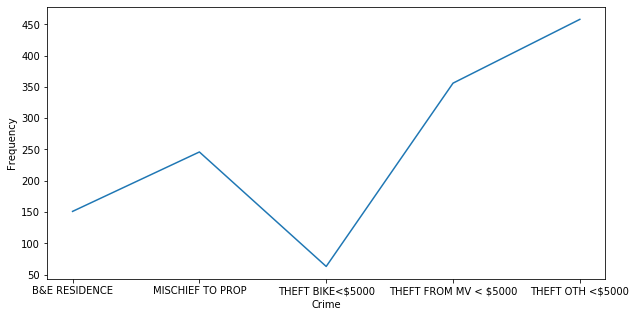

In [52]:
plt.figure(figsize = (10,5))
Chart = sns.lineplot(x = "Crime", y = "Frequency", data = CTD.nlargest(5,"Frequency"))

In [34]:
#Now that we have our top 5 crime Neighbourhoods and top 5 crimes let's see the top crimes in these neighbourhoods

In [61]:
Top_5 = CND.nlargest(5,"Frequency").Neighbourhood.unique()

In [64]:
Top_5 = ['Platt', 'Downtown', 'North Devon', 'Fredericton South',
       'Prospect']

In [72]:
#Create a Dataframe for the top 5 Neighbourhoods
Top_5DF = Crime[Crime["Neighbourhood"].isin(Top_5)]

In [73]:
Top_5DF.head()

,Neighbourhood,Crime_Code,Crime_Type,Ward,City,FID
0,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,1
1,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,2
2,Fredericton South,2120,B&E NON-RESIDNCE,12,Fredericton,3
3,Fredericton South,2120,B&E NON-RESIDNCE,12,Fredericton,4
4,Fredericton South,2120,B&E NON-RESIDNCE,7,Fredericton,5


In [83]:
DF = Top_5DF.groupby(["Neighbourhood","Crime_Type"]).size()

In [84]:
DF = pd.DataFrame(DF)

In [86]:
DF.reset_index(inplace = True)

In [88]:
DF.head()

,Neighbourhood,Crime_Type,0
0,Downtown,ARSON,1
1,Downtown,ARSON-DAM.PROP.,1
2,Downtown,B&E NON-RESIDNCE,7
3,Downtown,B&E RESIDENCE,3
4,Downtown,MISCHIEF TO PROP,29


In [89]:
DF.columns = ["Neighbourhood","Crime","Frequency"]

In [90]:
DF.head()

,Neighbourhood,Crime,Frequency
0,Downtown,ARSON,1
1,Downtown,ARSON-DAM.PROP.,1
2,Downtown,B&E NON-RESIDNCE,7
3,Downtown,B&E RESIDENCE,3
4,Downtown,MISCHIEF TO PROP,29


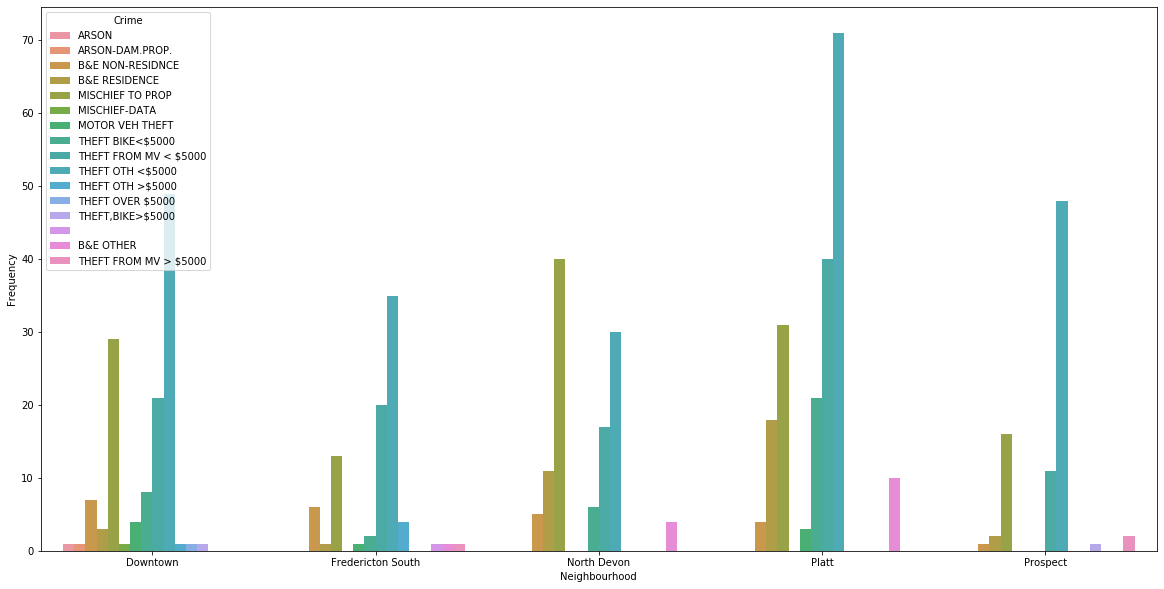

In [95]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Neighbourhood', y = "Frequency", data = DF, hue = "Crime")

## Now it is clear that North Devon Neighbourhood is the best place for us to start advertising our home alarm soundsystem while Platt is for our wearables division

In [96]:
from sklearn.cluster import KMeans

In [106]:
DF.head()

,Neighbourhood,Crime,Frequency
0,Downtown,ARSON,1
1,Downtown,ARSON-DAM.PROP.,1
2,Downtown,B&E NON-RESIDNCE,7
3,Downtown,B&E RESIDENCE,3
4,Downtown,MISCHIEF TO PROP,29


## K Means clustering is used to segment the various neighbourhoods into categories to identify which Neighbourhoods have similar features that I may have missed

In [112]:
kclusters = 3

CrimeClusters = DF.drop(['Neighbourhood',"Crime"], axis = 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(CrimeClusters)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 2, 1, 1, 1, 2, 0])

In [115]:
DF.insert(0, 'ClusterLabels', kmeans.labels_)



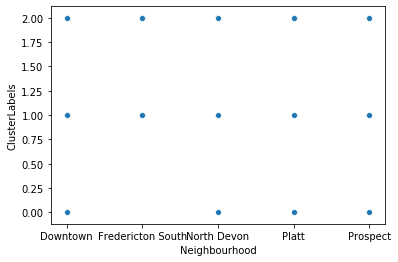

In [116]:
sns.scatterplot(x = "Neighbourhood", y = "ClusterLabels", data = DF)

In [118]:
DF.groupby('ClusterLabels').mean()

,Cluster Labels,Frequency
ClusterLabels,,
0,0.800000,49.600000
1,1.258065,3.806452
2,2.600000,23.800000


In [ ]:
### It is clear that because of the various crimes, the top 5 neighbourhoods have very similar features for their crime rates hence we can focus on anyone as a fertile market.